# **Developing a Classification Model for Bank Term Deposit**


The objective of this project is to build a machine learning model that can classify whether a customer will subscribe to a bank term deposit product, using customer data. The provided dataset contains information on 45,211 customers from a bank in Portugal, including binary labels indicating term deposit subscription, personal attributes, and marketing history.

In practice, it is more efficient to prioritize marketing efforts towards customers who are more likely to subscribe, rather than contacting all customers at random. Therefore, in this project, I analyze the data to identify key variables that contribute to model performance, and apply an appropriate machine learning classification algorithm to predict term deposit subscription.

The resulting predictive model can be used to support targeted marketing strategies, enabling more efficient allocation of marketing resources and potentially improving customer experience.

### **Feature Overview**

- age: Age

- job: Type of job

  - admin.: Administrative

  - blue-collar: Blue-collar worker

  - entrepreneur: Entrepreneur

  - housemaid: Housemaid

  - management: Management

  - retired: Retired

  - self-employed: Self-employed

  - services: Services

  - student: Student

  - technician: Technician

  - unemployed: Unemployed

  - unknown: Unknown

- marital: Marital status

  - divorced: Divorced or widowed

  - married: Married

  - single: Single

  - unknown: Unknown

- education: Level of education

  - primary: Primary education

  - secondary: Secondary education

  - tertiary: Tertiary education

  - unknown: Unknown

- default: Credit default status (yes or no)

- balance: Average annual account balance (in euros)

- housing: Has housing loan (yes or no)

- loan: Has personal loan (yes or no)

- contact: Type of contact communication

  - cellular: Mobile phone

  - telephone: Landline

  - unknown: Unknown

- day: Day of last contact with the customer (numeric, 1-31)

- month: Month of last contact with the customer (jan-dec, string)

- campaign: Number of contacts performed during this campaign

- pdays: Number of days passed since the client was last contacted in a previous campaign (-1 means client was not previously contacted)

- previous: Number of contacts performed before this campaign

- poutcome: Outcome of the previous marketing campaign

  - success: Success

  - failure: Failure

  - other: Other

  - unknown: Unknown

- y: Target variable for classification — whether the client subscribed to a term deposit (yes or no)

## **I. Data Import**

In [46]:
import numpy as np
import pandas as pd

!apt-get -qq install fonts-nanum
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

plt.rc('font', family='NanumGothic')
plt.rc('font', family='AppleGothic')
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (20, 5)

import warnings
warnings.filterwarnings('ignore')

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
bank_df = pd.read_csv('/content/drive/MyDrive/DataAnalytics/bank.csv')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


## **II. Data Preprocessing**

In [49]:
bank_df.shape

(45211, 16)

In [50]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [51]:
bank_df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [52]:
bank_df.describe()

,age,balance,day,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,63.000000,871.000000,275.000000


In [53]:
bank_df.duplicated().sum()

np.int64(16)

In [54]:
bank_df = bank_df.drop_duplicates()

In [55]:
bank_df.shape

(45195, 16)

## **III. Exploratory Data Analysis**

In [56]:
# Select numeric and categorical columns
numeric_cols = bank_df.select_dtypes(include='number').columns.tolist()
print('Numeric columns:', numeric_cols)

categorical_cols = bank_df.select_dtypes(include='object').columns.tolist()
print('Categorical columns:', categorical_cols)

Numeric columns: ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


### **3-1. Explore Numeric Variables**

**balance**

yes_mean: 1,804.27 
no_mean: 1,304.24


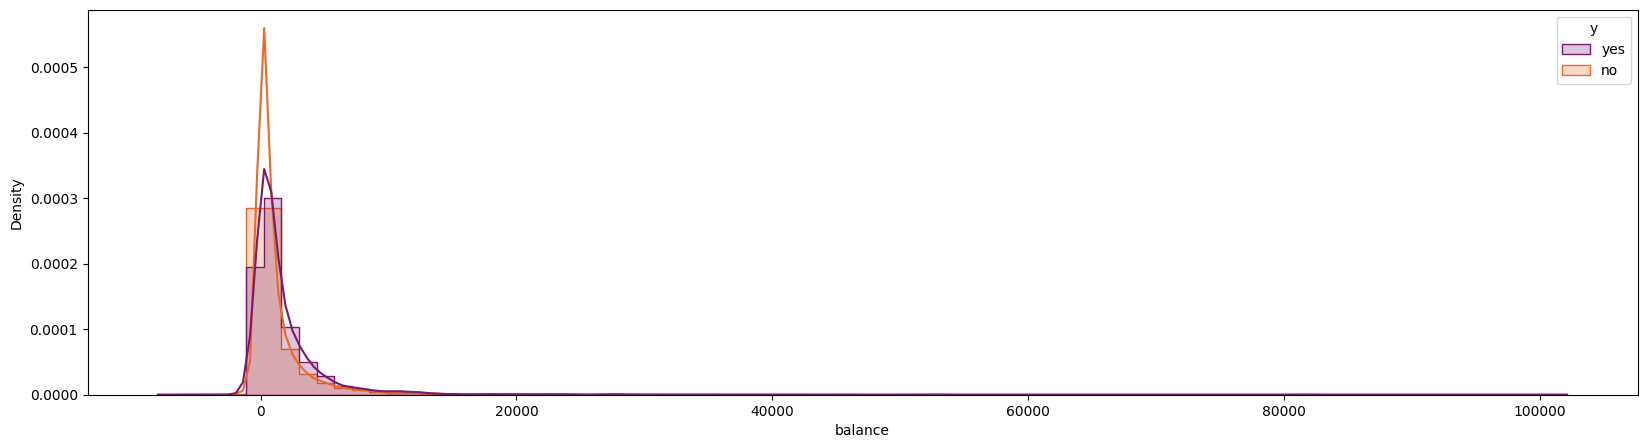

In [57]:
sns.histplot(data=bank_df, x='balance', hue='y',
             common_norm=False, kde=True, stat='density', bins=80, element='step',
             hue_order=['yes', 'no'], palette='inferno')

yes_mean = bank_df.query('y == "yes"')['balance'].mean()
no_mean = bank_df.query('y == "no"')['balance'].mean()
print(f"yes_mean: {yes_mean:,.2f} \nno_mean: {no_mean:,.2f}")

The average account balance appears to be slightly higher in the group of term deposit subscribers.

**campaign**

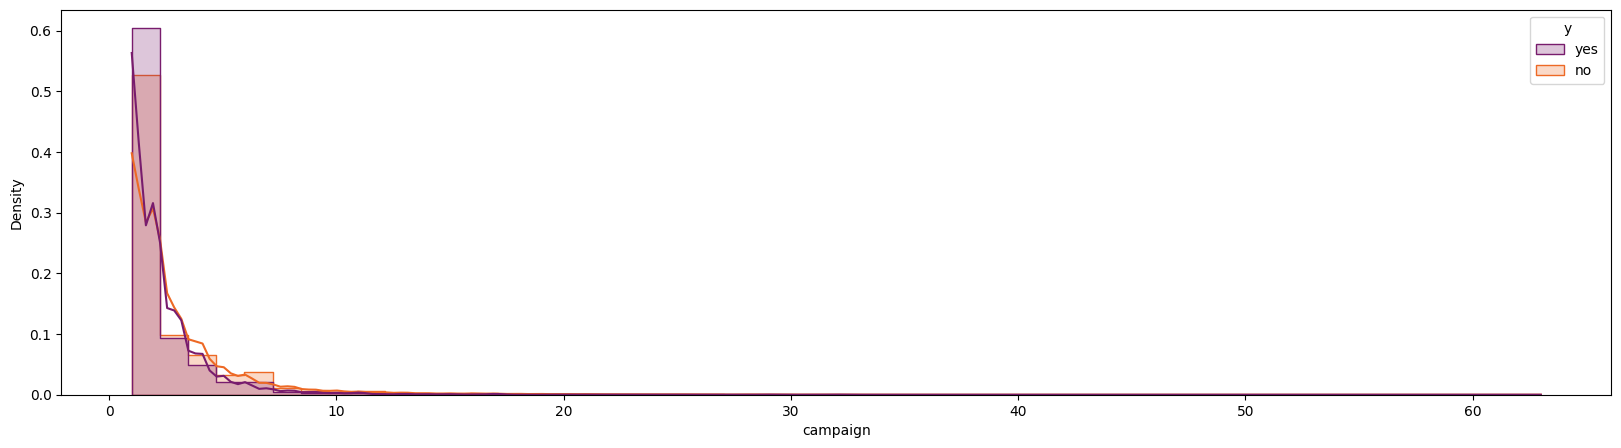

In [58]:
sns.histplot(data=bank_df, x='campaign', hue='y',
             common_norm=False, kde=True, stat='density', bins=50, element='step',
             hue_order=['yes', 'no'], palette='inferno');

Although the difference is not large, non-subscribers appear to have a slightly higher average number of contacts during the campaign compared to subscribers.

**pdays**

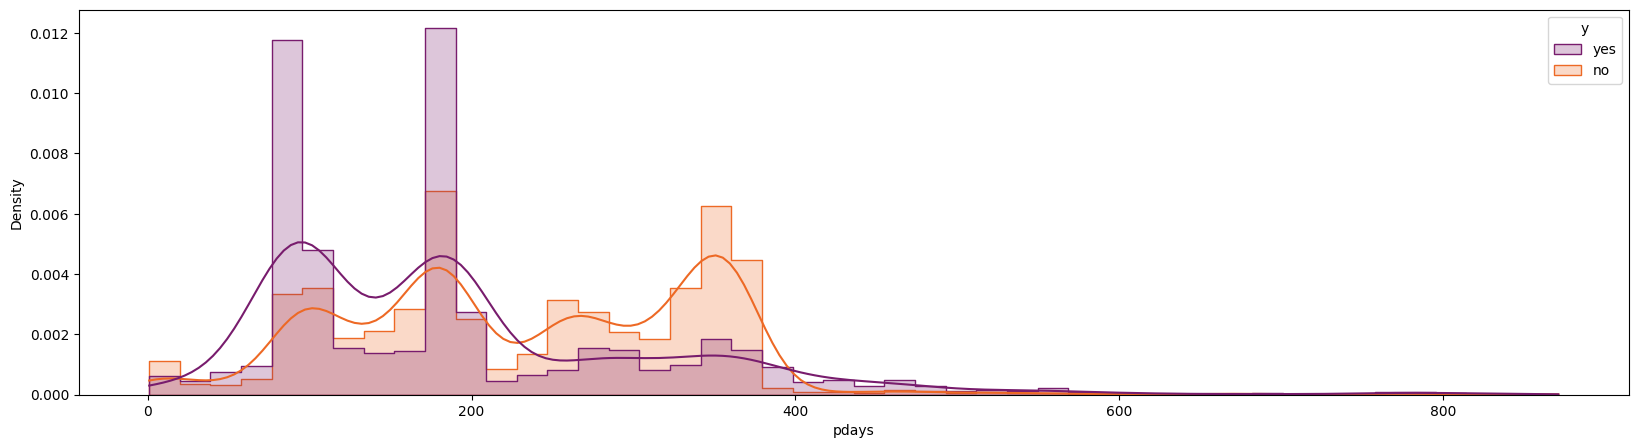

In [59]:
# Exclude clients never previously contacted (pdays == -1)
pdays_df = bank_df.query('pdays != -1')

sns.histplot(data=pdays_df, x='pdays', hue='y',
             common_norm=False, kde=True, stat='density', element='step',
             hue_order=['yes', 'no'], palette='inferno');

A higher proportion of non-subscribers appear to have a longer number of days since the last contact compared to subscribers.

**age**

yes_mean: 41.67 
no_mean: 40.84


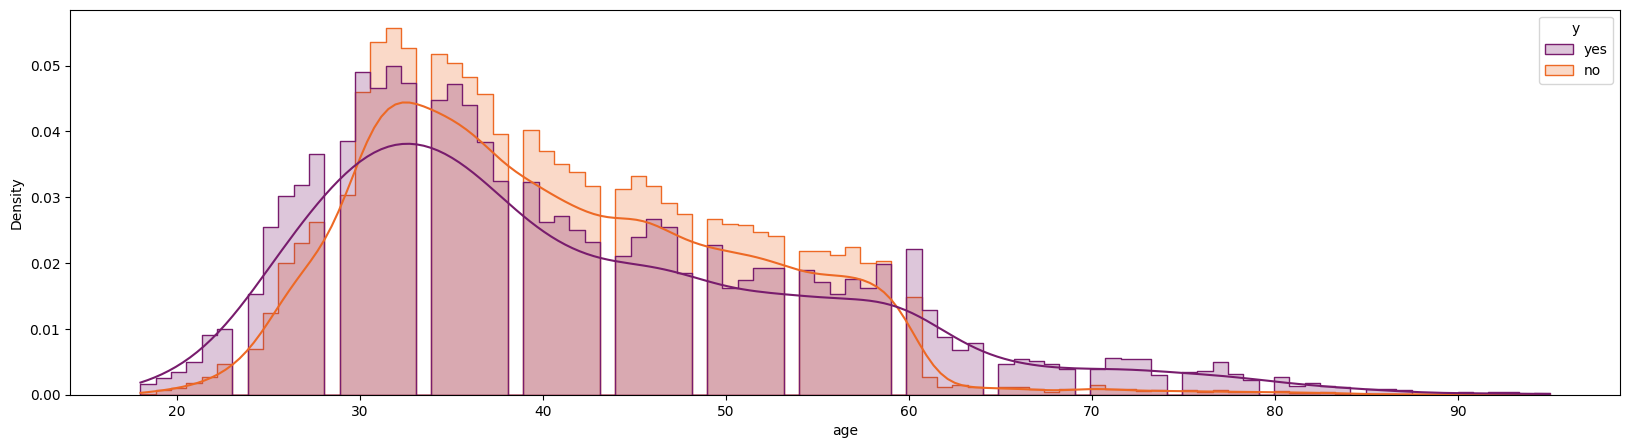

In [60]:
sns.histplot(data=bank_df, x='age', hue='y',
             common_norm=False, kde=True, stat='density', element='step',
             hue_order=['yes', 'no'], palette='inferno')

yes_mean = bank_df.query('y == "yes"')['age'].mean()
no_mean = bank_df.query('y == "no"')['age'].mean()
print(f"yes_mean: {yes_mean:,.2f} \nno_mean: {no_mean:,.2f}")

Subscribers appear to have a higher proportion of both younger customers under 30 and older customers aged 60 and above compared to non-subscribers. As a result, the average age of subscribers is slightly higher, but since the subscriber group includes more individuals at both ends of the age spectrum, comparing the groups using only the mean may not be appropriate.

In [61]:
# Create age groups
def age_group(age):
    if age < 20:
        return 'Under 20'
    elif age < 30:
        return '20s'
    elif age < 40:
        return '30s'
    elif age < 50:
        return '40s'
    elif age < 60:
        return '50s'
    elif age >= 60:
        return '60+'
    else:
        return 'N/A'

bank_df['age_group'] = bank_df['age'].apply(age_group)

age_dist = pd.pivot_table(bank_df, index='y', columns='age_group', values='job', aggfunc='count')
age_dist

age_group,20s,30s,40s,50s,60+,Under 20
y,,,,,,
no,4315,16166,10588,7624,1184,29
yes,910,1913,1063,785,600,18


In [62]:
age_dist_ratio = age_dist.div(age_dist.sum(axis=1), axis=0) * 100
age_dist_ratio.style.background_gradient(axis=0)

age_group,20s,30s,40s,50s,60+,Under 20
y,,,,,,
no,10.812910,40.510199,26.532351,19.104897,2.966972,0.072671
yes,17.205521,36.169408,20.098317,14.842125,11.344299,0.340329


In the subscriber group, there is a relatively higher proportion of younger individuals under 30 and older individuals aged 60 and above. In contrast, the non-subscriber group has a higher proportion of those in the middle-aged range, specifically those in their 30s to 50s.

### **3-2. Explore Categorical Variables**


**job**

In [63]:
job_count = bank_df.groupby(['y', 'job']).size().reset_index(name='count')
job_count

,y,job,count
0,no,admin.,4540
1,no,blue-collar,9022
2,no,entrepreneur,1364
3,no,housemaid,1131
4,no,management,8150
5,no,retired,1747
6,no,self-employed,1392
7,no,services,3783
8,no,student,669
9,no,technician,6753


In [64]:
job_count['percentage'] = job_count.groupby('y')['count'].transform(lambda x: x / x.sum())
job_count

,y,job,count,percentage
0,no,admin.,4540,0.113767
1,no,blue-collar,9022,0.226081
2,no,entrepreneur,1364,0.034180
3,no,housemaid,1131,0.028342
4,no,management,8150,0.204230
5,no,retired,1747,0.043778
6,no,self-employed,1392,0.034882
7,no,services,3783,0.094798
8,no,student,669,0.016764
9,no,technician,6753,0.169223


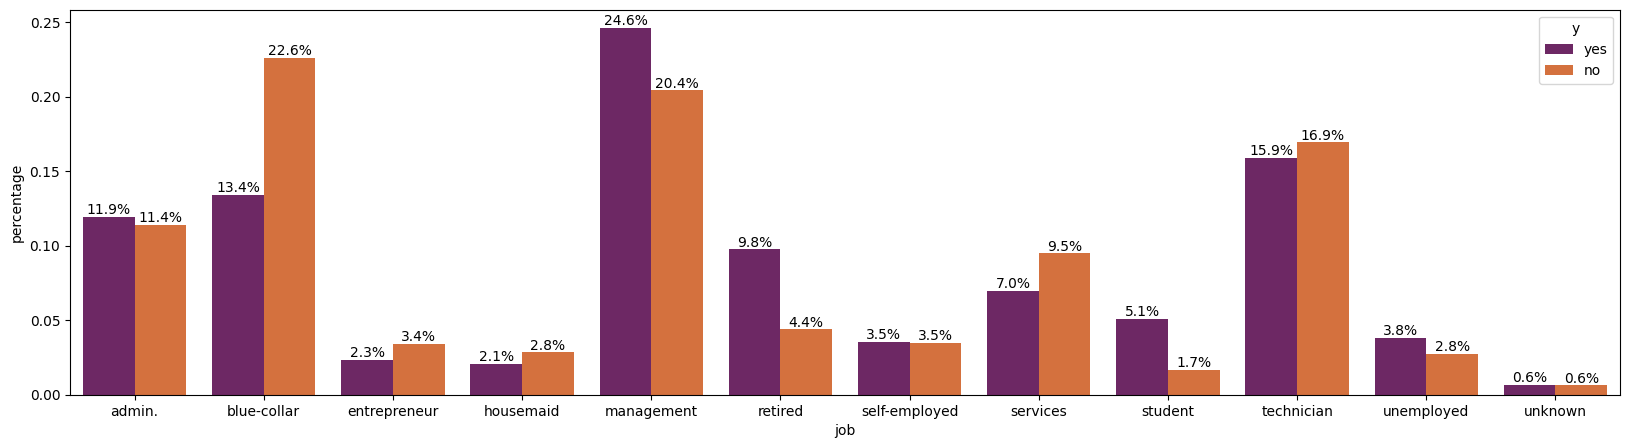

In [65]:
fig, ax = plt.subplots()
sns.barplot(data=job_count, x="job", y="percentage", hue="y", hue_order=['yes', 'no'], palette='inferno', ax=ax)

for c in ax.containers:
    ax.bar_label(c, fmt='{:.1%}')

**marital**


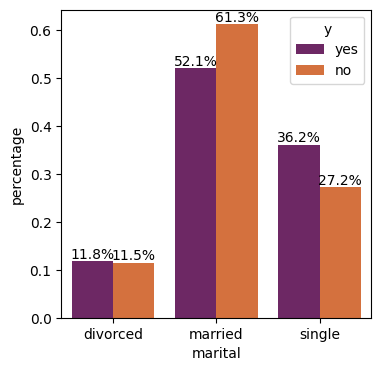

In [66]:
marital_count = bank_df.groupby(['y', 'marital']).size().reset_index(name='count')
marital_count['percentage'] = marital_count.groupby('y')['count'].transform(lambda x: x / x.sum())

fig, ax = plt.subplots(figsize=(4, 4))
sns.barplot(data=marital_count, x="marital", y="percentage", hue="y", hue_order=['yes', 'no'], palette='inferno', ax=ax)
for c in ax.containers:
    ax.bar_label(c, fmt='{:.1%}')

The subscriber group shows a relatively higher proportion of single individuals. However, since married customers are the largest group overall, they still make up the majority within the subscribers as well.

**education**

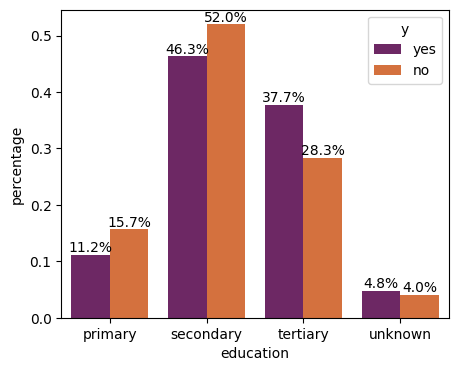

In [67]:
edu_count = bank_df.groupby(['y', 'education']).size().reset_index(name='count')
edu_count['percentage'] = edu_count.groupby('y')['count'].transform(lambda x: x / x.sum())

fig, ax = plt.subplots(figsize=(5, 4))
sns.barplot(data=edu_count, x="education", y="percentage", hue="y", hue_order=['yes', 'no'], palette='inferno', ax=ax)
for c in ax.containers:
    ax.bar_label(c, fmt='{:.1%}')

In the subscriber group, the proportion of customers with higher education (tertiary) is relatively high. However, due to the absolute difference in the number of customers, those with secondary education still make up the largest share among all subscribers.

## **IV. Predictive Modeling**

### **4-1. Data Preparation**

In [68]:
X = bank_df.drop(['y'], axis=1)
y = bank_df['y']

In [69]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,age_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,50s
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,40s
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,30s
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,40s
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,30s


In [70]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


In [71]:
# Drop derived columns for modeling
X = X.drop('age_group', axis=1)
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown


The pdays column represents the number of days since the last contact in a previous campaign, but it includes a value of -1, which means the customer has never been contacted before. Since -1 has a different meaning and cannot be interpreted continuously with the other values, the pdays column will be converted into a categorical variable.

In [72]:
# Examine distribution of pdays (for grouping)
X.query('pdays != -1').pdays.describe()

,pdays
count,8257.000000
mean,224.577692
std,115.344035
min,1.000000
25%,133.000000
50%,194.000000
75%,327.000000
max,871.000000


In [73]:
def pdays_group(pdays):
    if pdays == -1:
        return 'Never Contacted'
    elif pdays <= 100:
        return '≤100 Days'
    elif pdays <= 200:
        return '≤200 Days'
    elif pdays <= 300:
        return '≤300 Days'
    else:
        return '>300 Days'

X['pdays_group'] = X['pdays'].apply(pdays_group)
X[['pdays', 'pdays_group']].head()

,pdays,pdays_group
0,-1,Never Contacted
1,-1,Never Contacted
2,-1,Never Contacted
3,-1,Never Contacted
4,-1,Never Contacted


In [74]:
X = X.drop('pdays', axis=1)
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,pdays_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,0,unknown,Never Contacted
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,0,unknown,Never Contacted
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,0,unknown,Never Contacted
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,0,unknown,Never Contacted
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,0,unknown,Never Contacted


**Categorical Variable Encoding**

In [75]:
# Encode target: yes=1, no=0
y = y.apply(lambda x: 1 if x == 'yes' else 0)
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [76]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,previous,poutcome,pdays_group
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,0,unknown,Never Contacted
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,0,unknown,Never Contacted
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,0,unknown,Never Contacted
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,0,unknown,Never Contacted
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,0,unknown,Never Contacted


In [77]:
categorical_cols = X.select_dtypes(include='object').columns.tolist()
print(categorical_cols)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'pdays_group']


In [78]:
X_encoded = pd.get_dummies(X, columns=categorical_cols, dtype='int')
X_encoded.head()

,age,balance,day,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,pdays_group_>300 Days,pdays_group_Never Contacted,pdays_group_≤100 Days,pdays_group_≤200 Days,pdays_group_≤300 Days
0,58,2143,5,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,44,29,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,33,2,5,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,47,1506,5,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,33,1,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [79]:
X_encoded.columns

Index(['age', 'balance', 'day', 'campaign', 'previous', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'pdays_group_>300 Days',
       'pdays_group_Never Contacted', 'pdays_group_≤100 Days',
       'pdays_group_≤200 Days', 'pdays_group_≤3

In [80]:
X_encoded.head()

,age,balance,day,campaign,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,pdays_group_>300 Days,pdays_group_Never Contacted,pdays_group_≤100 Days,pdays_group_≤200 Days,pdays_group_≤300 Days
0,58,2143,5,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
1,44,29,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
2,33,2,5,1,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,47,1506,5,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
4,33,1,5,1,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


### **4-2. Model Training and Evaluation with Hyperparameter Tuning**

In [81]:
# !pip install catboost lightgbm xgboost

In [82]:
# !pip install optuna

In [83]:
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.model_selection import train_test_split

import optuna
import lightgbm as lgb
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [84]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Optuna tuning
def optuna_objective(trial, model_name, X_tr, y_tr, X_val, y_val):
    if model_name == 'LightGBM':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 300),
            'max_depth': trial.suggest_int('max_depth', 4, 16),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
            'num_leaves': trial.suggest_int('num_leaves', 20, 100),
            'random_state': 42
        }
        model = lgb.LGBMClassifier(**params, verbosity=-1)
    elif model_name == 'XGBoost':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 300),
            'max_depth': trial.suggest_int('max_depth', 4, 16),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
            'subsample': trial.suggest_float('subsample', 0.7, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.7, 1.0),
            'random_state': 42,
            'eval_metric': 'logloss',
            'use_label_encoder': False
        }
        model = xgb.XGBClassifier(**params)
    elif model_name == 'CatBoost':
        params = {
            'iterations': trial.suggest_int('iterations', 100, 300),
            'depth': trial.suggest_int('depth', 4, 10),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
            'random_state': 42,
            'verbose': 0
        }
        model = CatBoostClassifier(**params)
    elif model_name == 'RandomForest':
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 100, 300),
            'max_depth': trial.suggest_int('max_depth', 4, 16),
            'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced'])
        }
        model = RandomForestClassifier(**params, random_state=42)
    else:
        raise ValueError('Unknown model')
    model.fit(X_tr, y_tr)
    y_pred = model.predict(X_val)
    return f1_score(y_val, y_pred)

In [85]:
# Hyperparameter Tuning and Saving Results for Each Model
model_list = ['LightGBM', 'XGBoost', 'CatBoost', 'RandomForest']
results = []

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

for model_name in model_list:
    print(f"[Optuna] {model_name} tuning...")
    study = optuna.create_study(direction='maximize', study_name=model_name,
                                sampler=optuna.samplers.TPESampler(seed=42))
    func = lambda trial: optuna_objective(trial, model_name, X_tr, y_tr, X_val, y_val)
    study.optimize(func, n_trials=25, show_progress_bar=True)
    best_params = study.best_trial.params
    best_score = study.best_trial.value

    # Retrain best model
    if model_name == 'LightGBM':
        best_model = lgb.LGBMClassifier(**best_params, random_state=42, verbose=-1)
    elif model_name == 'XGBoost':
        best_model = xgb.XGBClassifier(**best_params, random_state=42, eval_metric='logloss', use_label_encoder=False, verbosity=0)
    elif model_name == 'CatBoost':
        best_model = CatBoostClassifier(**best_params, random_state=42, verbose=0)
    elif model_name == 'RandomForest':
        best_model = RandomForestClassifier(**best_params, random_state=42)
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    acc = accuracy_score(y_test, y_pred)

    # Model, Best F1 (Validation), Test F1, Test Accuracy, Key Parameters
    print(f" > {model_name} | Val F1: {best_score:.4f} | Test F1: {f1:.4f} | Test Acc: {acc:.4f}")
    results.append({
        'model': model_name,
        'best_params': best_params,
        'f1_val': best_score,
        'accuracy_test': acc,
        'f1_test': f1,
        'model_obj': best_model
    })

results_df = pd.DataFrame([
    {
        'Model': r['model'],
        'Val F1 Score': r['f1_val'],
        'Test Accuracy': r['accuracy_test'],
        'Test F1 Score': r['f1_test'],
        'Best Params': r['best_params']
    }
    for r in results
])

pd.set_option('display.max_colwidth', None)
print('\n========== Model Comparison Table ==========')
print(results_df)

# Select the Best Model (by Test F1 Score)
best_idx = results_df['Test F1 Score'].idxmax()
best_model_info = results[best_idx]
best_model = best_model_info['model_obj']
print(f"\n*** Best Model: {best_model_info['model']}Classifier ***")

[I 2025-07-13 10:47:34,487] A new study created in memory with name: LightGBM


[Optuna] LightGBM tuning...


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-07-13 10:47:34,928] Trial 0 finished with value: 0.3432574430823117 and parameters: {'n_estimators': 175, 'max_depth': 16, 'learning_rate': 0.14907884894416698, 'num_leaves': 68}. Best is trial 0 with value: 0.3432574430823117.
[I 2025-07-13 10:47:35,190] Trial 1 finished with value: 0.258130081300813 and parameters: {'n_estimators': 131, 'max_depth': 6, 'learning_rate': 0.021035886311957897, 'num_leaves': 90}. Best is trial 0 with value: 0.3432574430823117.
[I 2025-07-13 10:47:35,955] Trial 2 finished with value: 0.3160865475070555 and parameters: {'n_estimators': 220, 'max_depth': 13, 'learning_rate': 0.013911053916202464, 'num_leaves': 98}. Best is trial 0 with value: 0.3432574430823117.
[I 2025-07-13 10:47:36,364] Trial 3 finished with value: 0.33210332103321033 and parameters: {'n_estimators': 267, 'max_depth': 6, 'learning_rate': 0.04454674376934912, 'num_leaves': 34}. Best is trial 0 with value: 0.3432574430823117.
[I 2025-07-13 10:47:36,674] Trial 4 finished with value:

[I 2025-07-13 10:47:45,074] A new study created in memory with name: XGBoost


 > LightGBM | Val F1: 0.3729 | Test F1: 0.8713 | Test Acc: 0.8895
[Optuna] XGBoost tuning...


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-07-13 10:47:46,495] Trial 0 finished with value: 0.3268206039076377 and parameters: {'n_estimators': 175, 'max_depth': 16, 'learning_rate': 0.14907884894416698, 'subsample': 0.8795975452591109, 'colsample_bytree': 0.7468055921327309}. Best is trial 0 with value: 0.3268206039076377.
[I 2025-07-13 10:47:46,753] Trial 1 finished with value: 0.3397968605724838 and parameters: {'n_estimators': 131, 'max_depth': 4, 'learning_rate': 0.1745734676972377, 'subsample': 0.8803345035229626, 'colsample_bytree': 0.9124217733388136}. Best is trial 1 with value: 0.3397968605724838.
[I 2025-07-13 10:47:47,359] Trial 2 finished with value: 0.3492063492063492 and parameters: {'n_estimators': 104, 'max_depth': 16, 'learning_rate': 0.16816410175208013, 'subsample': 0.7637017332034828, 'colsample_bytree': 0.7545474901621302}. Best is trial 2 with value: 0.3492063492063492.
[I 2025-07-13 10:47:47,719] Trial 3 finished with value: 0.3472727272727273 and parameters: {'n_estimators': 136, 'max_depth': 7,

[I 2025-07-13 10:48:11,740] A new study created in memory with name: CatBoost


 > XGBoost | Val F1: 0.3623 | Test F1: 0.8728 | Test Acc: 0.8911
[Optuna] CatBoost tuning...


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-07-13 10:48:15,555] Trial 0 finished with value: 0.34270172257479603 and parameters: {'iterations': 175, 'depth': 10, 'learning_rate': 0.14907884894416698}. Best is trial 0 with value: 0.34270172257479603.
[I 2025-07-13 10:48:16,418] Trial 1 finished with value: 0.2974559686888454 and parameters: {'iterations': 220, 'depth': 5, 'learning_rate': 0.039638958863878505}. Best is trial 0 with value: 0.34270172257479603.
[I 2025-07-13 10:48:18,868] Trial 2 finished with value: 0.3376146788990826 and parameters: {'iterations': 111, 'depth': 10, 'learning_rate': 0.12421185223120967}. Best is trial 0 with value: 0.34270172257479603.
[I 2025-07-13 10:48:19,820] Trial 3 finished with value: 0.33608815426997246 and parameters: {'iterations': 242, 'depth': 4, 'learning_rate': 0.19428287191077892}. Best is trial 0 with value: 0.34270172257479603.
[I 2025-07-13 10:48:20,913] Trial 4 finished with value: 0.3064985451018429 and parameters: {'iterations': 267, 'depth': 5, 'learning_rate': 0.0445

[I 2025-07-13 10:49:04,744] A new study created in memory with name: RandomForest


 > CatBoost | Val F1: 0.3662 | Test F1: 0.8729 | Test Acc: 0.8911
[Optuna] RandomForest tuning...


  0%|          | 0/25 [00:00<?, ?it/s]

[I 2025-07-13 10:49:09,154] Trial 0 finished with value: 0.30392156862745096 and parameters: {'n_estimators': 175, 'max_depth': 16, 'class_weight': None}. Best is trial 0 with value: 0.30392156862745096.
[I 2025-07-13 10:49:10,798] Trial 1 finished with value: 0.38393574297188754 and parameters: {'n_estimators': 131, 'max_depth': 6, 'class_weight': 'balanced'}. Best is trial 1 with value: 0.38393574297188754.
[I 2025-07-13 10:49:15,839] Trial 2 finished with value: 0.4337606837606838 and parameters: {'n_estimators': 220, 'max_depth': 13, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.4337606837606838.
[I 2025-07-13 10:49:19,002] Trial 3 finished with value: 0.38832590190514793 and parameters: {'n_estimators': 267, 'max_depth': 6, 'class_weight': 'balanced'}. Best is trial 2 with value: 0.4337606837606838.
[I 2025-07-13 10:49:21,714] Trial 4 finished with value: 0.25614754098360654 and parameters: {'n_estimators': 161, 'max_depth': 10, 'class_weight': None}. Best is trial 2 

**Confusion Matrix**

<Figure size 600x500 with 0 Axes>

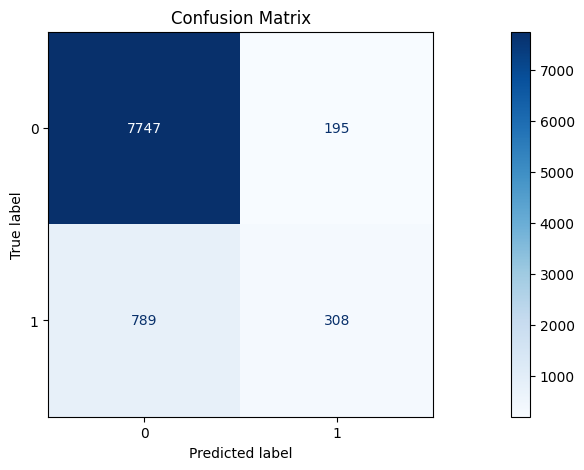

In [86]:
from sklearn.metrics import ConfusionMatrixDisplay

plt.figure(figsize=(6,5))
ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

**Precision:**

- Precision represents the proportion of predicted "True" (subscriber) cases that are actually True.

- For class 0 (non-subscribers), the precision is 91%, meaning that 91% of those predicted as non-subscribers are correct.

- For class 1 (subscribers), the precision is 61%, meaning that only 61% of predicted subscribers are truly subscribers.

- Thus, the model’s prediction for non-subscribers is much more reliable than for subscribers.

**Recall:**

- Recall is the proportion of actual "True" (subscriber) cases that the model correctly identifies.

- For class 0, the recall is 98%—the model captures nearly all actual non-subscribers.

- For class 1, recall is only 28%—the model misses most actual subscribers, often predicting them as non-subscribers (many false negatives).

- This indicates a major weakness in identifying subscribers.

**Support:**

- Support shows the number of actual samples for each class:

  - 0 (non-subscribers): 7,942
  - 1 (subscribers): 1,097

- The data is highly imbalanced, so the model tends to predict 0 when uncertain, since that will be correct most of the time.

**F1-score:**

- The f1-score is the harmonic mean of precision and recall, balancing both metrics.

- For class 0, f1-score is very high (94%), reflecting strong performance.

- For class 1, it is low (39%), showing the model’s difficulty in identifying actual subscribers.

**Accuracy:**

- The model’s overall accuracy is about 89%.

- However, due to the high imbalance (many more non-subscribers), accuracy alone is misleading—
f1-score and recall for class 1 are more informative for evaluating the model's true usefulness.

### **4-3. Identifying Important Features**

**Feature Importance**

The 'feature_importances_' attribute in tree-based models shows how much each feature contributed to improving prediction performance.
It measures the total reduction in impurity (such as Gini or entropy) that each feature provided during the model’s splits.

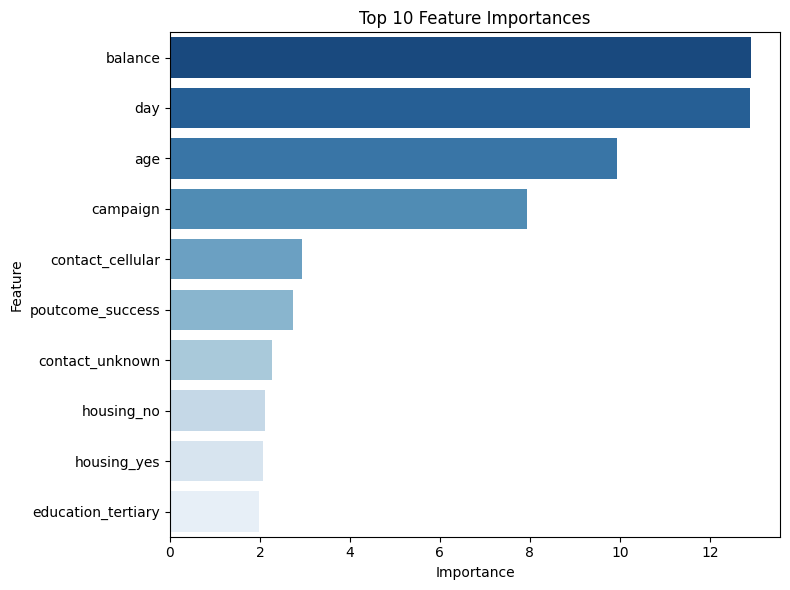

In [87]:
# Feature Importance Visualization
if hasattr(best_model, 'feature_importances_'):
    importances = pd.Series(best_model.feature_importances_, index=X_train.columns)
    top10 = importances.sort_values(ascending=False)[:10]
    plt.figure(figsize=(8, 6))
    plt.title('Top 10 Feature Importances')
    sns.barplot(x=top10, y=top10.index, palette='Blues_r')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("This model does not support feature_importances_.")

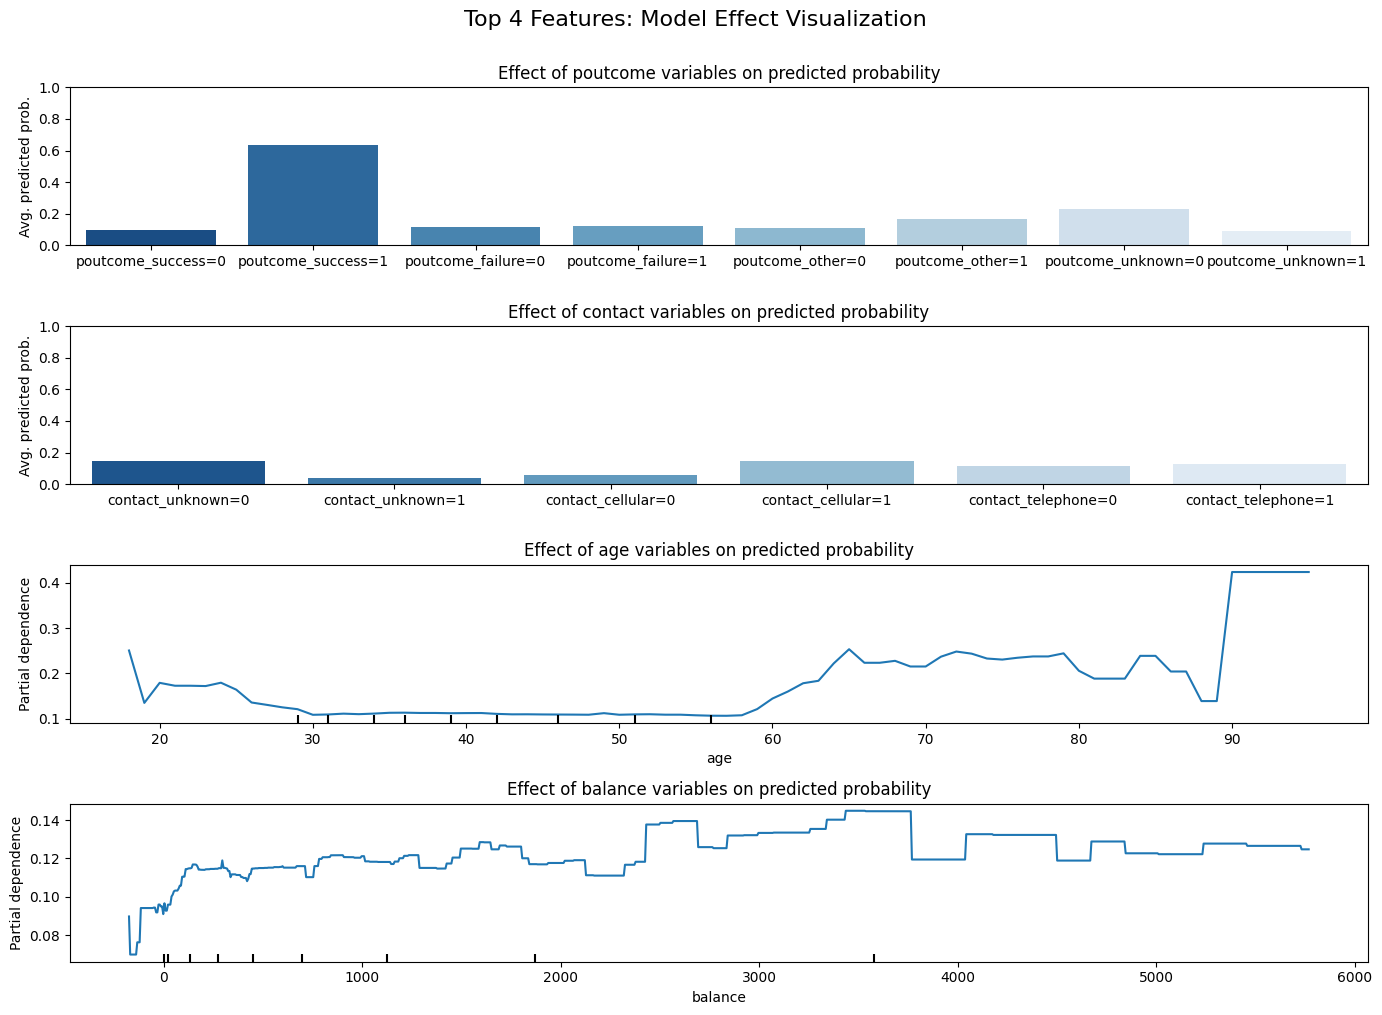

In [88]:
from sklearn.inspection import PartialDependenceDisplay

fig, axes = plt.subplots(4, 1, figsize=(14, 10))

# 1. poutcome dummy variables barplot
dummy_features = ['poutcome_success', 'poutcome_failure', 'poutcome_other', 'poutcome_unknown']
vals = []
labels = []
for feat in dummy_features:
    for val in [0, 1]:
        if (X_train[feat] == val).sum() > 0:
            mean_pred = best_model.predict_proba(X_train[X_train[feat] == val])[:, 1].mean()
            vals.append(mean_pred)
            labels.append(f'{feat}={val}')
        else:
            vals.append(np.nan)
            labels.append(f'{feat}={val}')
sns.barplot(x=labels, y=vals, palette='Blues_r', ax=axes[0])
axes[0].set_ylim(0, 1)
axes[0].set_title('Effect of poutcome variables on predicted probability')
axes[0].set_ylabel('Avg. predicted prob.')

# 2. contact dummy variables barplot
contact_features = ['contact_unknown', 'contact_cellular', 'contact_telephone']
vals2 = []
labels2 = []
for feat in contact_features:
    for val in [0, 1]:
        if (X_train[feat] == val).sum() > 0:
            mean_pred = best_model.predict_proba(X_train[X_train[feat] == val])[:, 1].mean()
            vals2.append(mean_pred)
            labels2.append(f'{feat}={val}')
        else:
            vals2.append(np.nan)
            labels2.append(f'{feat}={val}')
sns.barplot(x=labels2, y=vals2, palette='Blues_r', ax=axes[1])
axes[1].set_ylim(0, 1)
axes[1].set_title('Effect of contact variables on predicted probability')
axes[1].set_ylabel('Avg. predicted prob.')

# 3. age
PartialDependenceDisplay.from_estimator(
    best_model, X_train, features=['age'], kind='average', grid_resolution=1000, ax=axes[2]
)
axes[2].set_title('Effect of age variables on predicted probability')
axes[2].set_ylabel('Partial dependence')

# 4. balance
PartialDependenceDisplay.from_estimator(
    best_model, X_train, features=['balance'], kind='average', grid_resolution=1000, ax=axes[3]
)
axes[3].set_title('Effect of balance variables on predicted probability')
axes[3].set_ylabel('Partial dependence')

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.suptitle("Top 4 Features: Model Effect Visualization", fontsize=16, y=1.01)
plt.show()

**Partial dependence plot (PDP)**

A partial dependence plot (PDP) shows how a model’s predictions change as a specific feature varies, while all other features are held constant. It helps visualize the marginal effect of a feature on the predicted outcome, making the model’s behavior more interpretable.

**1. poutcome**

When poutcome_success equals 1, the predicted probability of term deposit subscription is significantly higher.
In other words, if a customer's previous campaign outcome was successful, the model estimates a much higher likelihood of subscribing to a term deposit.

**2. contact**

When contact_unknown=1 (the contact method is unknown), the predicted probability of deposit subscription is low.
In contrast, when contact_cellular=1 (the contact method is a mobile phone), the probability is notably higher.
That is, knowing the customer’s mobile phone number is associated with an increased likelihood of subscription.

**3. age**

The model predicts a higher probability of deposit subscription for customers who are under 30 or over 60 years old.
(The probability tends to be lower for those in the middle age groups.)

**4. balance**

Customers with higher average account balances are more likely to subscribe to term deposits,
but after around €2,000, the effect plateaus and further increases have minimal impact.
(All amounts are denominated in Euros in this dataset.)


## **V. Conclusion**

### **(1) Modeling and Methodology**

In this analysis, we analyzed four representative tree-based classification models—LightGBM, XGBoost, CatBoost, and RandomForest—to predict whether customers would subscribe to a term deposit.
The hyperparameters of each model were automatically tuned using Optuna with Bayesian Optimization.
To prevent overfitting, the data was split into training, validation, and test sets, and the final model performance was evaluated using various metrics, including F1 Score and accuracy.

After tuning with Optuna, the test set accuracy of each model ranged from approximately 88-90%.
In particular, for non-subscribers (class 0), the models achieved very high prediction accuracy (97%), precision (91%), and F1-score (94%).
On the other hand, for actual subscribers (class 1), the recall was 28%, precision was 61%, and F1-score was 39%, indicating that the models excel at predicting non-subscribers but have clear limitations in predicting subscribers, especially in terms of recall.

The actual data distribution is highly imbalanced, with 7,942 non-subscribers (class 0) and 1,097 subscribers (class 1), meaning there are over seven times as many non-subscribers as subscribers.
As a result, the models tend to predict class 0 when uncertain.
Therefore, in such data environments, it is essential to interpret class-wise precision, recall, and F1-score together, rather than relying solely on accuracy.


### **(2) Key Findings and Business Insights**

The key variables that increase the likelihood of subscribing to a term deposit were previous campaign success (poutcome_success), contact method (contact_cellular, contact_unknown, contact_telephone), age, and average account balance (balance).
The probability of subscription was significantly higher when poutcome_success was 1 (previous campaign success), when contact_cellular was 1 (mobile phone contact), for customers under 30 or over 60, and for those with an average balance of €2,000 or more.

Based on these results, future marketing strategies should consider separately targeting customers under 30 and over 60,
focusing on customers who have previously participated in successful campaigns, those for whom mobile phone contact information is available, and high-balance clients.
Since the models predict non-subscribers with very high accuracy, it is recommended to exclude low-probability customers and concentrate resources on high-probability target segments for greater efficiency and impact.